(sec:euler_method)=
# The Euler method

The Euler method is the simplest numerical method used to solve ODEs can be derived very easily by truncating equation the Taylor series after the first-order term

$$y(t + h) = y(t) + h y'(t).$$

We wish to solve the ODE $y'(t) = f(t, y)$ so we have

$$y(t + h) = y(t) + h f(t, y).$$

Introducing subscript notation where $y(t) = y_n$ and $y(t+h) = y_{n+1}$ then this becomes

````{admonition} Definition: The Euler method
:class: note
:name: euler-method-definition

```{math}
:label: euler-method-equation
y_{n+1} = y_n + h f(t_n ,y_n),
```

````

where $t_n = a + hn$ is a discrete value of $t$ at some step $n$. The solution of the initial value problem using the Euler method will result in two vectors containing the values of $t$ and $y$

\begin{align*}
    \mathbf{t} &= \begin{pmatrix} t_0 \\ t_0 + h \\ t_0 + 2h \\ \vdots \\ t_0 + nh \end{pmatrix}, &
    \mathbf{y} &= \begin{pmatrix} y_0 \\ y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}.
\end{align*}

To apply the Euler method to solve an initial value problem of the form $y'=f(t, y)$ over the domain $t\in [a, b]$ with $y(a) = \alpha$ we first calculate the number of steps of the method that are required so that we calculate up to $t_n = b$. If we are using a constant value for the step length than the number of steps required is

$$n = \operatorname{int}\left(\frac{b - a}{h}\right),$$

where $\operatorname{int}(x)$ rounds the number $x$ to the integer below. If $h$ divides $b - a$ exactly then the last value of $t_n = b$. If $h$ does not divide $b - a$ exactly then $t_n < b$, in these cases we can use a smaller step length for the last step or leave it as it is (here we will use a constant value of $h$).

To solve an initial value problem using the Euler method we first initialise the $t_0 = a$ and $y_0 = \alpha$ and then calculate the value of $y_1$ using equation {eq}`euler-method-equation` and $t_1 = t_0 + h$. Then we use $t_1$ and $y_1$ to calculate the value of $y_2$ and $t_2 = t_1 + h$. We continue in this way until we have calculated up to $y_n$ and $t_n$. The Euler method is an example of a **single step method** since it only requires information from a single step of the solution to calculate the next step.

````{admonition} Example 1.2
:class: seealso
:name: euler-example

Calculate the solution to the following initial value problem using the Euler method with $h = 0.2$

$$y' = ty, \qquad t\in [0,1], \qquad y(0)=1,$$

and compare the computed solution to the exact solution which is $y = \exp\left(\dfrac{t^2}{2}\right)$.

**Solution**

Since $t\in[0,1]$ and $h=0.2$ then the number of steps required is

$$n = \operatorname{int}\left(\frac{1 - 0}{0.2}\right) = 5, $$

and the $t$ values are 

$$\mathbf{t} = (0, 0.2, 0.4, 0.6, 0.8, 1.0).$$

We know the ODE function is $f(t, y) = ty$ and initial value is $y_0 = 1$ so using equation {eq}`euler-method-equation`

\begin{align*}
    y_1 &= y_0 + h f(t_0, y_0) = 1 + 0.2(0)(1) = 1,  \\
    y_2 &= y_1 + h f(t_1, y_1) = 1 + 0.2(0.2)(1) = 1.04, \\
    y_3 &= y_2 + h f(t_2, y_2) = 1.04 + 0.2(0.4)(1.04) = 1.1232, \\
    y_4 &= y_3 + h f(t_3, y_3) = 1.1232 + 0.2(0.6)(1.1232) = 1.257984, \\
    y_5 &= y_4 + h f(t_4, y_4) = 1.257984 + 0.2(0.8)(1.257984) = 1.459261.
\end{align*}
 
The computed solutions, the exact solutions and the errors between the computed and exact solutions are tabulated below.

| $t$  |   Euler   |   Exact   |  Error   |
|:----:|:---------:|:---------:|:--------:|
| 0.00 |  1.000000 |  1.000000 | 0.00e+00 |
| 0.20 |  1.000000 |  1.020201 | 2.02e-02 |
| 0.40 |  1.040000 |  1.083287 | 4.33e-02 |
| 0.60 |  1.123200 |  1.197217 | 7.40e-02 |
| 0.80 |  1.257984 |  1.377128 | 1.19e-01 |
| 1.00 |  1.459261 |  1.648721 | 1.89e-01 |
  
````

(py:euler)=
## Python code

You may have noticed that calculating the solution to an initial value problem using a numerical method using a pen, paper and calculator is a tedious exercise requiring lots of repeated calculations. This is way we use computers to do this work for us. First we import the [NumPy](https://numpy.org/) and [matplotlib](https://matplotlib.org/) libraries so that we can perform numerical calculations and produce plots of the solutions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The Python code below defines the function `euler()` which calculates the Euler method solutions to an initial value problem.

In [2]:
def euler(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        
    return t, y 

The inputs to the function `euler()` are:

- `f` - the name of the ODE function to be solved;
- `tspan` - an array of two values defining the lower and upper boundaries of the $t$ domain;
- `y0` - an array of values containing the solution of the ODE at the initial value $t=a$;
- `h` - the step length used.

The function first determines the number of steps required and the number of ODEs being solved and stores these in `nsteps` and `neq` respectively. In the example here we are only solving for one equation but later we will need to be able to solve multiple ODEs at the same time (see [solving systems of ODEs](solving-systems-of-odes-section)). It then calculates two arrays called `t` and `y`. The array `t` array contains the values of $t_n$ for which the Euler method calculates the solution and is determined by `h` and `nsteps`[^1]. The `y` array has `nsteps + 1` rows and `neq` columns will contain the solutions of the ODE(s) where each row contains the solution at each step of the Euler method and the first row of `y` is set to `y0` since it contains the initial solution. A `for` loop is used to loop through each of the steps and calculate the solution using the Euler method. The arrays `t` and `y` containing the solution to the IVP are returned.

[^1]: This assumes that we are using a constant step length. Some methods use [adaptive step size](https://en.wikipedia.org/wiki/Adaptive_step_size) where the value of $h$ is modified at each step to optimise the accuracy. These methods are outside the scope of this unit so will not be considered here)

The code below defines the functions `f(t, y)` and `exact(t)` which calculate the ODE function and exact solution to the IVP (this is usually not known). 

In [3]:
def f(t, y):
    return t * y


def exact(t):
    return np.exp(t ** 2 / 2)

The code below defines the IVP parameters and calls the `euler()` function to solve the IVP. The solutions are outputted in a table containing the numerical solution, the exact solution and the absolute error.

In [4]:
# Define IVP parameters
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.2         # step length

# Calculate the solution to the IVP
t, y = euler(f, tspan, y0, h)

# Print table of solution values
print("|  t   |   Euler   |   Exact   |  Error   |")
print("|:----:|:---------:|:---------:|:--------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {y[n,0]:9.6f} | {exact(t[n]):9.6f} | {abs(y[n,0] - exact(t[n])):8.2e} |")

|  t   |   Euler   |   Exact   |  Error   |
|:----:|:---------:|:---------:|:--------:|
| 0.00 |  1.000000 |  1.000000 | 0.00e+00 |
| 0.20 |  1.000000 |  1.020201 | 2.02e-02 |
| 0.40 |  1.040000 |  1.083287 | 4.33e-02 |
| 0.60 |  1.123200 |  1.197217 | 7.40e-02 |
| 0.80 |  1.257984 |  1.377128 | 1.19e-01 |
| 1.00 |  1.459261 |  1.648721 | 1.89e-01 |


In most cases, a plot of the solution is more useful for looking at the behaviour of the solution. The code below plots the numerical solution obtained using the Euler method with the exact solution.

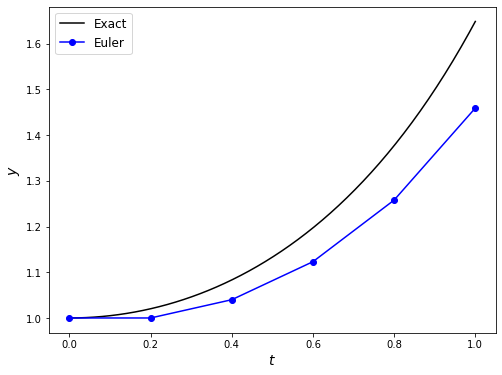

In [5]:
# Calculate exact solution
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)

# Plot solution
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y, "bo-", label="Euler")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

Note that the solution obtained using the Euler method deviates away from the exact solution as the value of $t$ increases.